# Netflix Recommendation System 

In [19]:
from datetime import datetime
import numpy as np 
import pandas as pd 
import scipy
import math 
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import os 



In [4]:
start = datetime.now()
if not os.path.isfile('data.csv'):
    data = open('data.csv', mode = 'w')
    row = list()
    files = ['data_file/combined_data_1.txt','data_file/combined_data_2.txt', 
           'data_file/combined_data_3.txt', 'data_file/combined_data_4.txt']
    for file in files:
        print('Reading Ratings From {}....'.format(file))
        with open(file) as f:
            for line in f:
                line = line.strip()
                if line.endswith(':'):
                    movie_id = line.replace(':', '')
                else:
                    row = [x for x in line.split(',')]
                    row.insert(0, movie_id)
                    data.write(','.join(row))
                    data.write('\n')
        print('Done')
    data.close()
print('Total Time Taken :', datetime.now() - start)    

Reading Ratings From data_file/combined_data_1.txt....
Done
Reading Ratings From data_file/combined_data_2.txt....
Done
Reading Ratings From data_file/combined_data_3.txt....
Done
Reading Ratings From data_file/combined_data_4.txt....
Done
Total Time Taken : 0:01:53.437854


In [5]:
print('Creating the dataframe from data.csv file..')
df = pd.read_csv('data.csv', sep = ',', names = ['movie', 'user','rating','date'])
df.date = pd.to_datetime(df.date)
print('Done\n')
print('Sorting the dataframe by date..')
df.sort_values(by = 'date', inplace = True)
print('Done..')

Creating the dataframe from data.csv file..
Done

Sorting the dataframe by date..
Done..


In [6]:
df.head()

,movie,user,rating,date
56431994,10341,510180,4,1999-11-11
9056171,1798,510180,5,1999-11-11
58698779,10774,510180,3,1999-11-11
48101611,8651,510180,2,1999-11-11
81893208,14660,510180,2,1999-11-11


In [9]:
df.shape

(100480507, 4)

In [7]:
df['rating'].describe()

count    1.004805e+08
mean     3.604290e+00
std      1.085219e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [10]:
print('Number of NaN values in our DataFrame :', df.isnull().any().sum())

Number of NaN values in our DataFrame : 0


In [11]:
dup_bool = df.duplicated(['movie', 'user', 'rating'])
dups = sum(dup_bool)
print('Number of duplicate entries : ', dups)

Number of duplicate entries :  0


In [12]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings : ", df.shape[0])
print("Total No of Users   : ", len(np.unique(df.user)))
print("Total No of movies  : ", len(np.unique(df.movie)))

Total data 
--------------------------------------------------

Total no of ratings :  100480507
Total No of Users   :  480189
Total No of movies  :  17770


In [14]:
if not os.path.isfile('train.csv'):
    df.iloc[:int(df.shape[0] * 0.80)].to_csv('train.csv', index = False)
if not os.path.isfile('test.csv'):
    df.iloc[int(df.shape[0] * 0.80):].to_csv('test.csv', index = False)
    
train_df = pd.read_csv('train.csv', parse_dates = ['date'])
test_df = pd.read_csv('test.csv')

In [15]:
print("Training data ")
print("-"*50)
print("\nTotal no of ratings :",train_df.shape[0])
print("Total No of Users   :", len(np.unique(train_df.user)))
print("Total No of movies  :", len(np.unique(train_df.movie)))

Training data 
--------------------------------------------------

Total no of ratings : 80384405
Total No of Users   : 405041
Total No of movies  : 17424


In [16]:
print("Test data ")
print("-"*50)
print("\nTotal no of ratings :",test_df.shape[0])
print("Total No of Users   :", len(np.unique(test_df.user)))
print("Total No of movies  :", len(np.unique(test_df.movie)))

Test data 
--------------------------------------------------

Total no of ratings : 20096102
Total No of Users   : 349312
Total No of movies  : 17757


In [17]:
def readable(num, units = 'M'):
    units = units.lower()
    num = float(num)
    if units == 'K':
        return str(num / 10 ** 3) + " K"
    elif units == 'm':
        return str(num / 10 ** 6) + " M"
    elif units == 'b':
        return str(num / 10 ** 9) + " B"

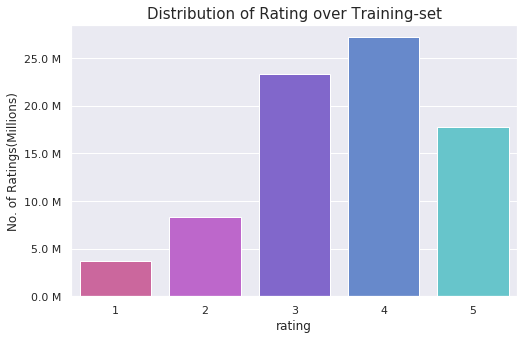

In [33]:
sns.set()
#plt.figure(figsize = (8, 5))
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
plt.title('Distribution of Rating over Training-set', fontsize = 15)
sns.countplot(train_df.rating, palette = reversed(sns.color_palette("hls", 10)))
ax.set_yticklabels([readable(item, 'M') for item in ax.get_yticks()])
ax.set_ylabel('No. of Ratings(Millions)')

plt.show()

In [34]:
pd.options.mode.chained_assignment = None  # default='warn'

train_df['day_of_week'] = train_df.date.dt.weekday_name
train_df.tail()

,movie,user,rating,date,day_of_week
80384400,12074,2033618,4,2005-08-08,Monday
80384401,862,1797061,3,2005-08-08,Monday
80384402,10986,1498715,5,2005-08-08,Monday
80384403,14861,500016,4,2005-08-08,Monday
80384404,5926,1044015,5,2005-08-08,Monday


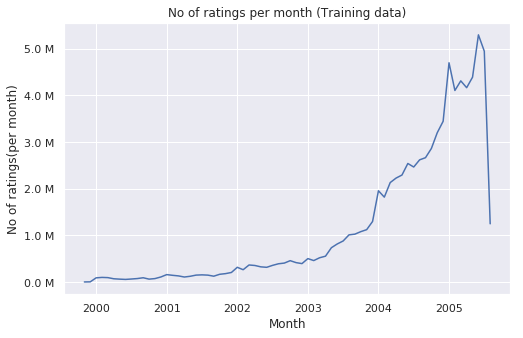

In [39]:
plt.figure(figsize = (8, 5))
ax = train_df.resample('m', on='date')['rating'].count().plot()
ax.set_title('No of ratings per month (Training data)')
plt.xlabel('Month')
plt.ylabel('No of ratings(per month)')
ax.set_yticklabels([readable(item, 'M') for item in ax.get_yticks()])
plt.show()

In [40]:
mv_rating_per_user = train_df.groupby(by = 'user')['rating'].count().sort_values(ascending = False)
mv_rating_per_user.head()

user
305344     17112
2439493    15896
387418     15402
1639792     9767
1461435     9447
Name: rating, dtype: int64